In [34]:
import numpy as np  
from scipy.optimize import minimize
import matplotlib.pyplot as plt 

In [35]:
def logistic_function(x, slope, midpoint, scale):
    """Takes slope max and midpoint.  """
    val = scale / (1 + np.exp(slope * (x - midpoint)))
    return val   
    

### Data found in Rebeccas BA

In [36]:
data_hct = np.array([0.1,0.2,0.3,0.4])
data_rpi = np.array([2.5,2,1.5,1])

In [37]:
def obj_fun(array, x, d):
    scale = array[0]
    slope = array[1]
    midpoint = array[2]
    residues = (d-logistic_function(x,slope, midpoint, scale))**2
    return residues.sum()
res = minimize(obj_fun,x0=[1,1,1],args=(data_hct, data_rpi))
res.x

array([3.53277352, 5.99743712, 0.24658778])

In [38]:
hkt = np.arange(0, 0.5, 0.01)
fit_time = logistic_function(hkt, res.x[0], res.x[1], res.x[2])

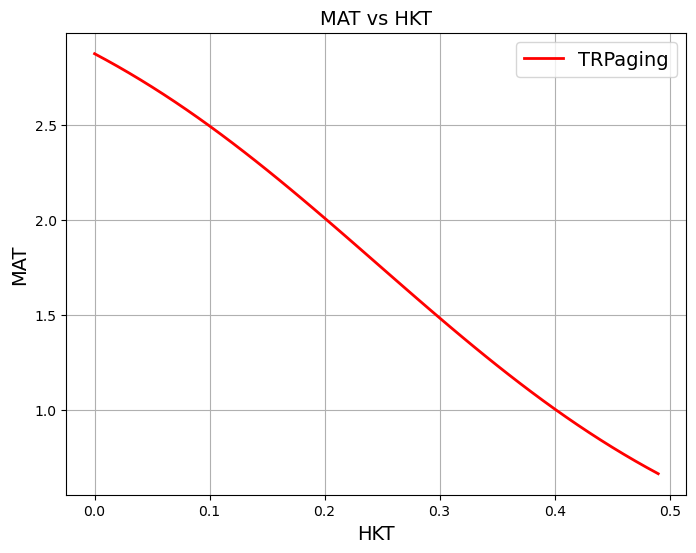

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(hkt, mat_time, color='red', linewidth=2, label='Fitting')
ax.set_xlabel('HKT', fontsize=14)
ax.set_ylabel('MAT', fontsize=14)
ax.set_title('MAT vs HKT', fontsize=14)
ax.grid(True)
ax.legend(loc='best', fontsize=14)
plt.show()